In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("latence_reseau.csv", sep=(";"))

In [7]:
df.head()

,Bande_passante_Mbps,Distance_km,Taux_utilisation_%,Nombre_sauts,Type_lien,Latence_ms
0,10,2,30,2,0,18
1,20,5,40,3,0,25
2,50,10,60,4,0,40
3,100,15,70,5,0,55
4,100,5,30,2,1,12


In [8]:
df.describe()

,Bande_passante_Mbps,Distance_km,Taux_utilisation_%,Nombre_sauts,Type_lien,Latence_ms
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,91.176471,12.352941,54.705882,3.705882,0.823529,34.647059
std,79.599180,8.992644,23.549853,1.794600,0.808957,18.272046
min,10.000000,1.000000,10.000000,1.000000,0.000000,9.000000
25%,30.000000,5.000000,40.000000,2.000000,0.000000,18.000000
50%,60.000000,10.000000,60.000000,4.000000,1.000000,32.000000
75%,100.000000,20.000000,70.000000,5.000000,1.000000,48.000000
max,300.000000,30.000000,90.000000,7.000000,2.000000,68.000000


In [9]:
df.isnull().sum()

,0
Bande_passante_Mbps,0
Distance_km,0
Taux_utilisation_%,0
Nombre_sauts,0
Type_lien,0
Latence_ms,0


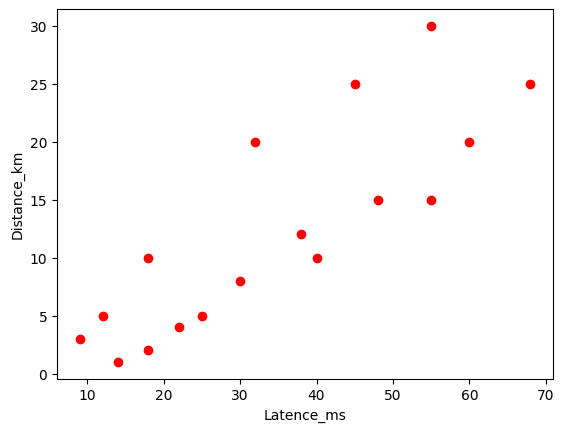

In [10]:
L = plt.xlabel("Latence_ms")
D = plt.ylabel("Distance_km")
plt.scatter(df["Latence_ms"],df["Distance_km"], color = "red")

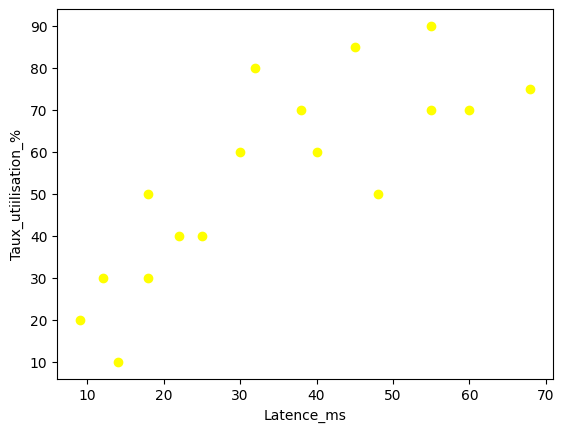

In [11]:
L = plt.xlabel("Latence_ms")
T = plt.ylabel("Taux_utiilisation_%")
plt.scatter(df["Latence_ms"],df["Taux_utilisation_%"], color = "yellow")

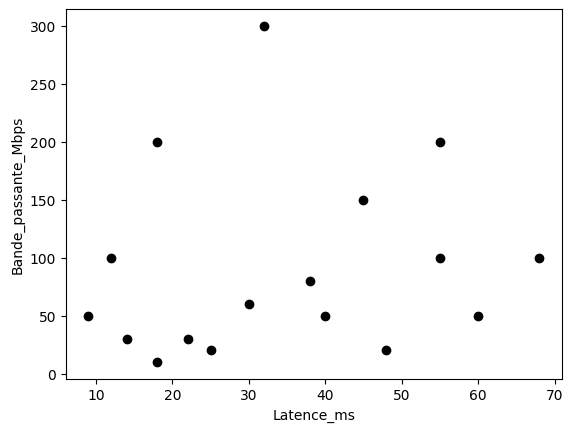

In [12]:
L = plt.xlabel("Latence_ms")
B = plt.ylabel("Bande_passante_Mbps")
plt.scatter(df["Latence_ms"],df["Bande_passante_Mbps"], color = "black")

In [13]:
x = df[['Bande_passante_Mbps','Distance_km','Taux_utilisation_%','Nombre_sauts','Type_lien']]

In [14]:
y = df['Latence_ms']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [16]:
lr = linear_model.LinearRegression()
lr

LinearRegression()

In [17]:
lr.fit(x_train, y_train)

LinearRegression()

In [18]:
data = lr.predict(x_test)

In [19]:
data

array([28.73747075, 38.88804318, 17.39413572, 53.98873531])

In [20]:
print("r2_score :", (y_test, data))

r2_score : (0     18
1     25
5     18
15    60
Name: Latence_ms, dtype: int64, array([28.73747075, 38.88804318, 17.39413572, 53.98873531]))


In [23]:
print("RMSE : " , root_mean_squared_error(y_test, data))

RMSE :  9.282690829894452


In [24]:
print("MAE  : ",mean_absolute_error(y_test,data))

MAE  :  7.810660723119916


##